# README
- モデル訓練のためのデータとモデルの性能を評価するためのデータに分ける

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## データの準備

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
# skleranの変数名の方式に合わせておく(X: 説明変数 y: 目的変数)
X = boston.data[:, 5:6]  # RMだけをつかう
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 1) (102, 1)
(404,) (102,)


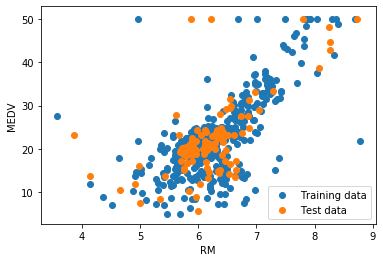

In [5]:
# TrainingData と TestData を可視化
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

plt.xlabel('RM')
plt.ylabel('MEDV')

plt.legend()

## 予測モデルの構築

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 結果の確認

In [7]:
a = linear_regression.coef_[0]
b = linear_regression.intercept_

print(f'MEDV = {a:.2f} RM + {b:.2f}')

MEDV = 9.38 RM + -36.48


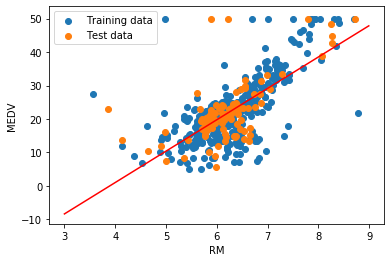

In [11]:
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

# 3 から 9 を 0.01 刻みにしたデータを生成
x_line = np.arange(3, 9, step=0.01)

# 予測値の計算( .predict(X) で予測できる)
y_pred = linear_regression.predict(x_line.reshape(-1, 1))

# 直線を描画
plt.plot(x_line, y_pred, c='r')


plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()

In [9]:
# TrainingData における R2スコア(決定係数)
r2_score_train = linear_regression.score(X_train.reshape(-1, 1), y_train)
print(f'R^2 Train: {r2_score_train:.3f}')

# TestData における R2スコア
r2_score_test = linear_regression.score(X_test.reshape(-1, 1), y_test)
print(f'R^2 Test: {r2_score_test:.3f}')

R^2 Train: 0.497
R^2 Test: 0.424


- テストデータばっかりに当てはまっちゃうのは問題になるのでは？
- いろんなモデルを比較するときはこの枠組みでいいのか？